# LetsGrowMore
Name : UMA MAHESWARI

Task 1 : Exploratory Data Analysis on Dataset - Terrorism 

Level 02 : INTERMEDIATE LEVEL TASK

# INTRODUCTION :
    
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import folium
from folium.plugins import MarkerCluster


# Data Loading and Exploration

In [3]:
#Importing the dataset.

data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding ='latin =1')

data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
data.shape

(181691, 135)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [9]:
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [10]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Data Cleaning

In [11]:
data = data.fillna('NaN')

In [12]:
data.isnull().sum()

eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [13]:
data.dropna(inplace=True)##Removing missing data

<AxesSubplot:>

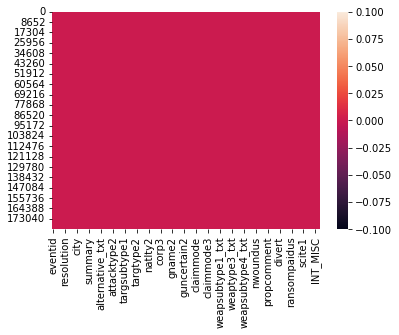

In [14]:
sns.heatmap(data.isnull())

# Exploratory Data Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'eventid'),
  Text(0, 1.5, 'iyear'),
  Text(0, 2.5, 'imonth'),
  Text(0, 3.5, 'iday'),
  Text(0, 4.5, 'extended'),
  Text(0, 5.5, 'country'),
  Text(0, 6.5, 'region'),
  Text(0, 7.5, 'vicinity'),
  Text(0, 8.5, 'crit1'),
  Text(0, 9.5, 'crit2'),
  Text(0, 10.5, 'crit3'),
  Text(0, 11.5, 'success'),
  Text(0, 12.5, 'suicide'),
  Text(0, 13.5, 'attacktype1'),
  Text(0, 14.5, 'targtype1'),
  Text(0, 15.5, 'individual'),
  Text(0, 16.5, 'weaptype1'),
  Text(0, 17.5, 'property'),
  Text(0, 18.5, 'INT_LOG'),
  Text(0, 19.5, 'INT_IDEO'),
  Text(0, 20.5, 'INT_MISC'),
  Text(0, 21.5, 'INT_ANY')])

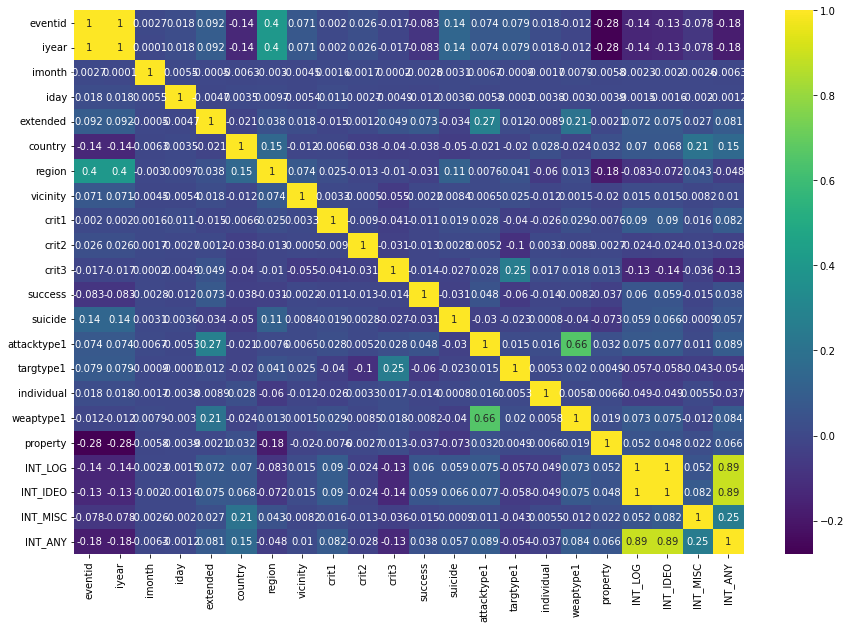

In [16]:
#Correlation Analysis
plt.figure(figsize=(15,10))

sns.heatmap(np.round(data.corr(),4), annot=True, cmap = 'viridis')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

### Terrorist Activities in Each Year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1995'),
  Text(25, 0, '1996'),
  Text(26, 0, '1997'),
  Text(27, 0, '1998'),
  Text(28, 0, '1999'),
  Text(29, 0, '2000'),
  Text(30, 0, '2001'),
  Text(31, 0, '2002'),
  Text(32, 0, '2003'),
  Text(33, 0, '2004'),
  Text(34, 0, 

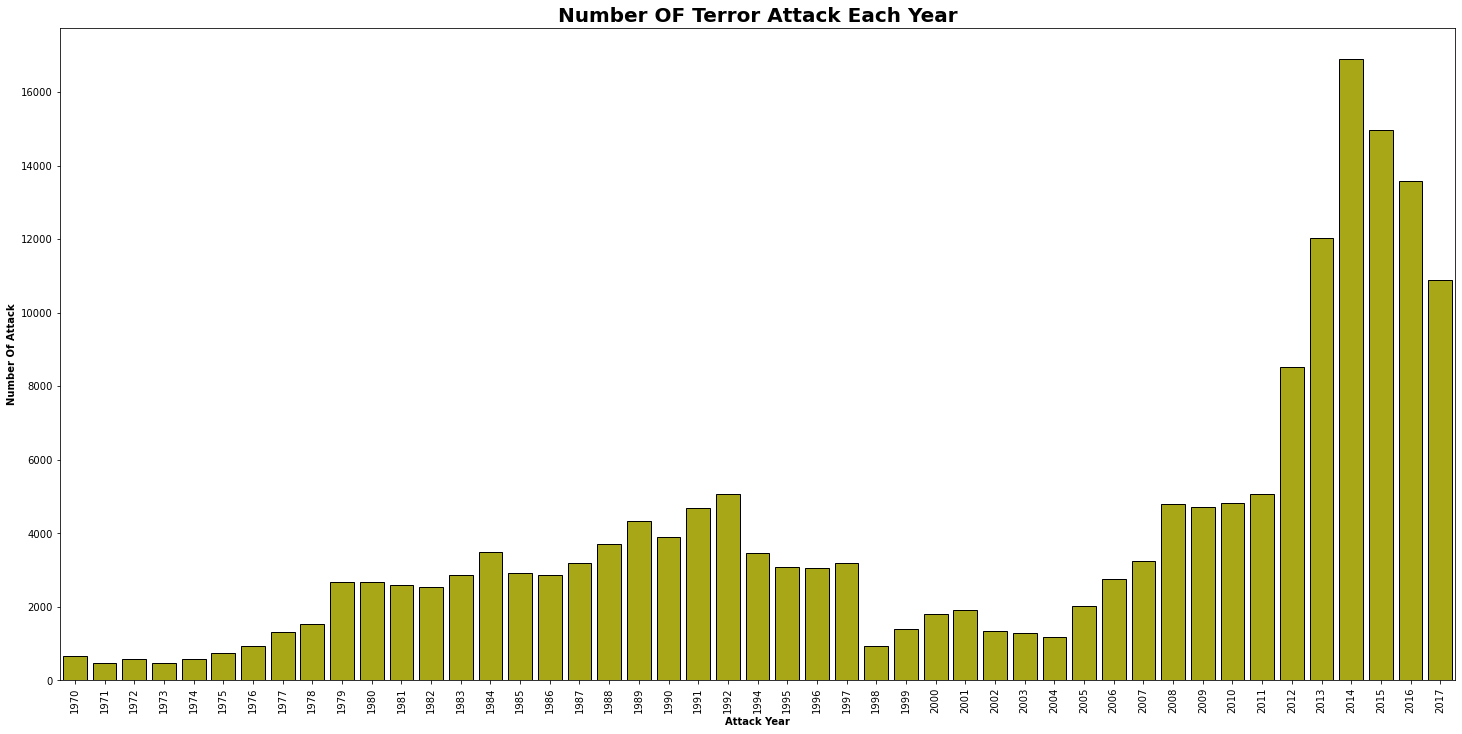

In [18]:
plt.figure(figsize=(25,12))
sns.countplot(data['iyear'], color='y', edgecolor='k')
plt.xlabel('Attack Year',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Number OF Terror Attack Each Year', fontweight='bold',fontsize=20)
plt.xticks(rotation = 90)

In Year 2014 and 2015 has a larger Number of Terrorist Activities

### Number of Success Attacks Each Year

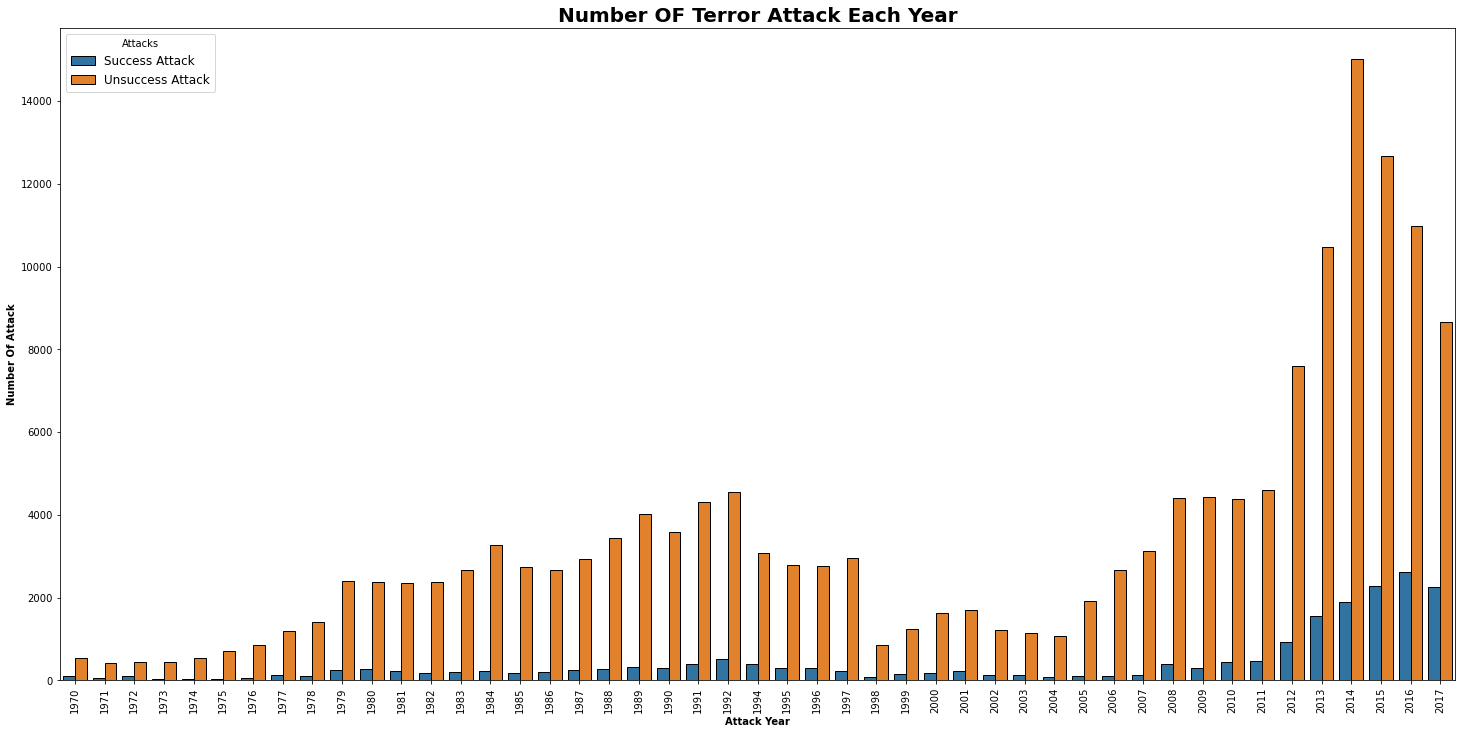

In [20]:
plt.figure(figsize=(25,12))
sns.countplot(x=data['iyear'], hue='success', data=data, edgecolor = 'k')
plt.xlabel('Attack Year',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Number OF Terror Attack Each Year', fontweight='bold',fontsize=20)
plt.xticks(rotation = 90)
plt.legend(title='Attacks', loc='upper left', labels=['Success Attack', 'Unsuccess Attack'], fontsize=12)

In Year 2014 having large number of Terrorist Activities but in 2016 has Most successful Attacks done by terrorist.

### Terrorist Activities by Region In Each Year

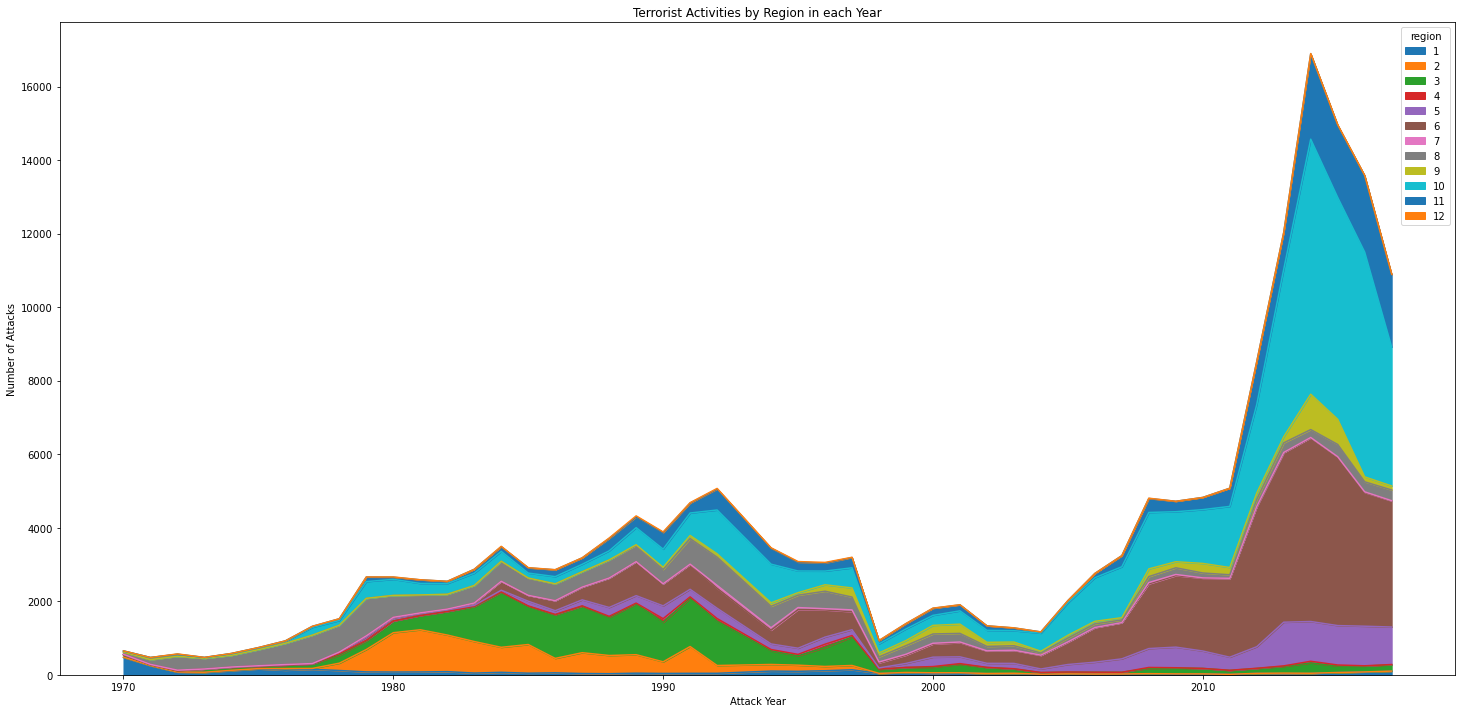

In [21]:
pd.crosstab(data['iyear'], data['region']).plot(kind='area', figsize=(25,12))
plt.title('Terrorist Activities by Region in each Year')
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks')
plt.show()

In 'Middle East & North Africa' Region having Most attacks.

### Type of Attack

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '3'),
  Text(1, 0, '2'),
  Text(2, 0, '1'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '9'),
  Text(6, 0, '8'),
  Text(7, 0, '5'),
  Text(8, 0, '4')])

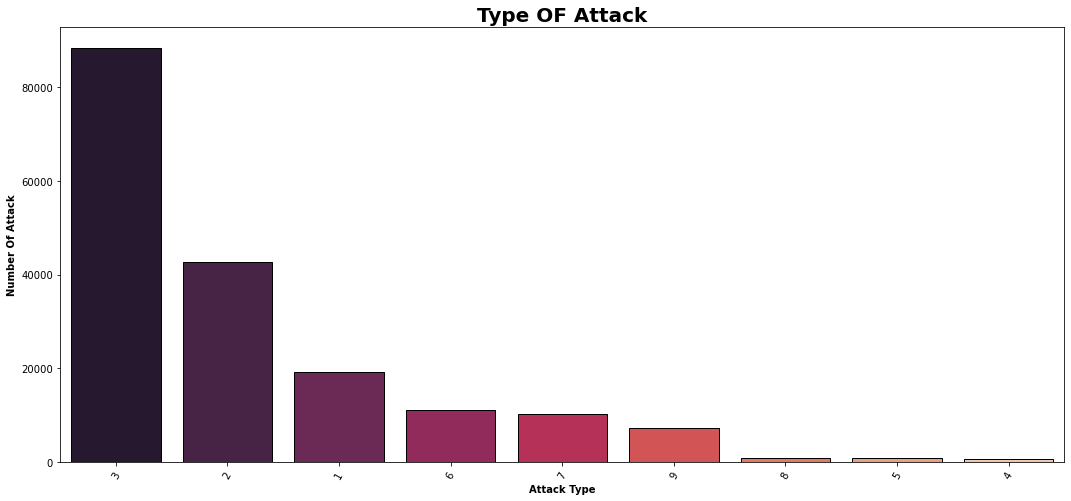

In [26]:
plt.figure(figsize=(18,8))
sns.countplot(data['attacktype1'], order=data['attacktype1'].value_counts().index, edgecolor='k',palette='rocket')
plt.xlabel('Attack Type',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Type OF Attack', fontweight='bold',fontsize=20)
plt.xticks(rotation = 60)

Maximum Number Of Attack are From Bombing/Explosion and Armed Assault

### Type of Target

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '14'),
  Text(1, 0, '4'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, '19'),
  Text(6, 0, '21'),
  Text(7, 0, '20'),
  Text(8, 0, '15'),
  Text(9, 0, '8'),
  Text(10, 0, '7'),
  Text(11, 0, '17'),
  Text(12, 0, '10'),
  Text(13, 0, '22'),
  Text(14, 0, '6'),
  Text(15, 0, '16'),
  Text(16, 0, '12'),
  Text(17, 0, '18'),
  Text(18, 0, '11'),
  Text(19, 0, '9'),
  Text(20, 0, '5'),
  Text(21, 0, '13')])

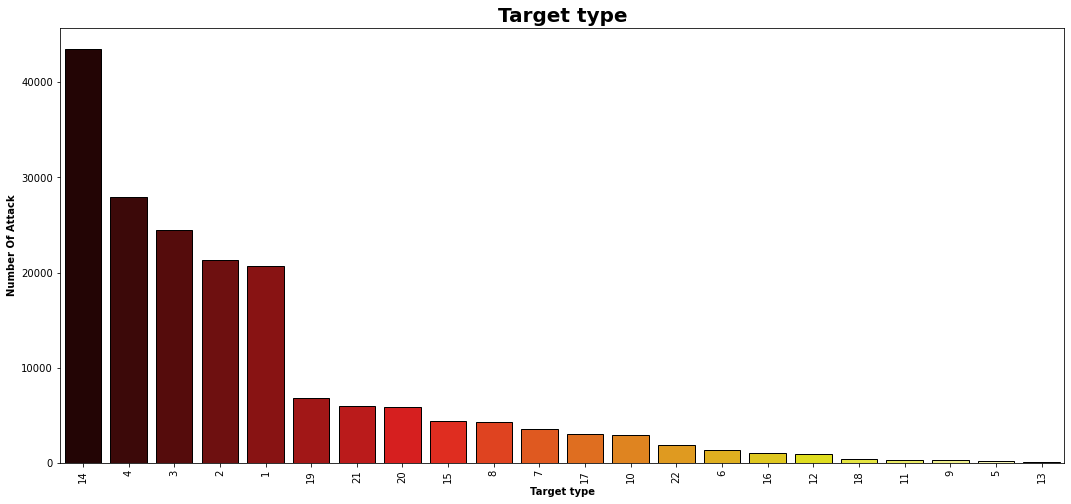

In [28]:
plt.figure(figsize=(18,8))
sns.countplot(data['targtype1'], order=data['targtype1'].value_counts().index, edgecolor='k',palette='hot')
plt.xlabel('Target type',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Target type', fontweight='bold',fontsize=20)
plt.xticks(rotation = 90)

 The Main Target of Terrorist is Private Citizens&Property and Military.

### Total Number of Attack in Each Contry and Region(Top10)

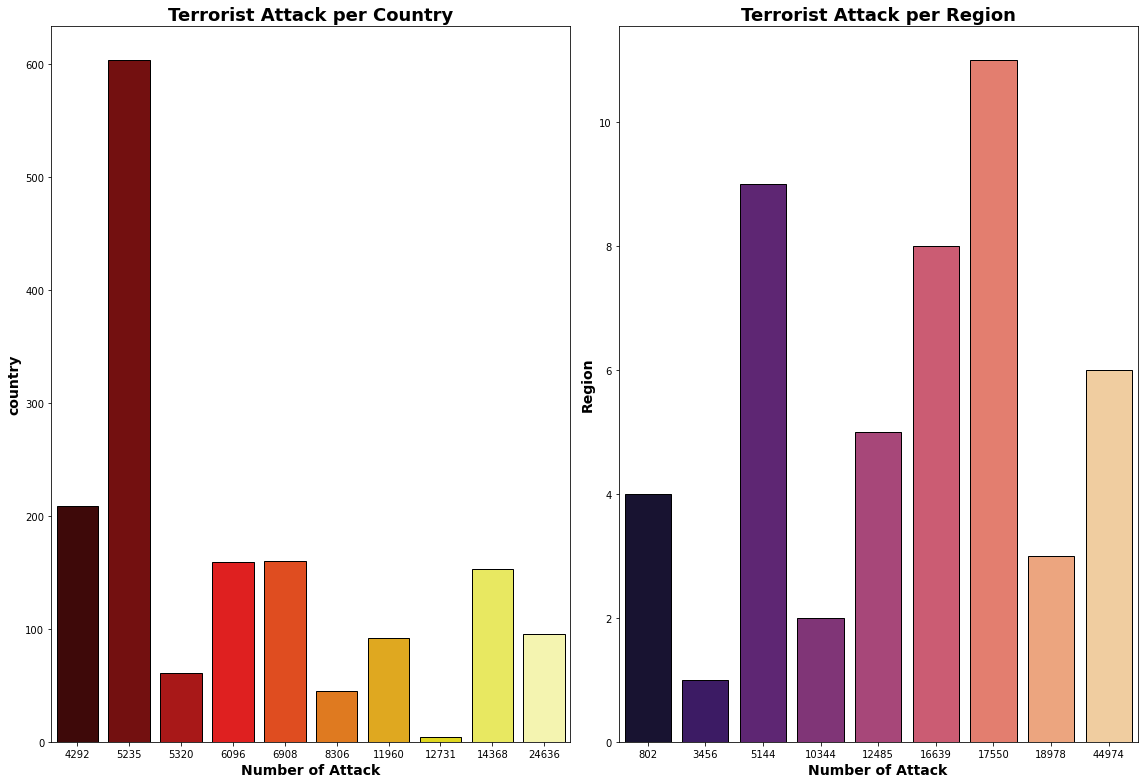

In [33]:
#plt.figure(figsize=(15,10))
#axes=plt.subplots(nrows=1, ncols=2)
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(y=data['country'].value_counts()[0:10].index,x=data['country'].value_counts()[0:10].values,palette='hot', ax=axes[0],edgecolor='k' )
axes[0].set_title('Terrorist Attack per Country',fontweight='bold',fontsize=18)
axes[0].set_xlabel('Number of Attack',fontweight='bold',fontsize=14)
axes[0].set_ylabel('country', fontweight='bold',fontsize=14)


sns.barplot(y=data['region'].value_counts()[1:10].index,x=data['region'].value_counts()[1:10].values,palette='magma',ax=axes[1],edgecolor='k')
axes[1].set_xlabel('Number of Attack',fontweight='bold',fontsize=14)
axes[1].set_ylabel('Region', fontweight='bold',fontsize=14)
axes[1].set_title('Terrorist Attack per Region', fontweight='bold',fontsize=18)
fig.tight_layout()
plt.show()


Maximum Terrorist Activities are in Iraq.

# Conclusion

1.Iraq ranked first on global terrorist activity followed by Pakistan, Afghanistan then India and so on.

2.Most Targeted Areas are Private Citizens&Property, Military,Police and so on.

3.Global Terror attack rise sharply from 2011 and Maximum Attacks are in 2014 and Maximum people where died in 2014.